# k-NN implementation on Iris dataset.
---

                                                                A colloborative work by Anurag Sharma and Sumona Mondal

 ##### k-Nearest Neighbor(k-NN) is an instance-based supervised learning algorithm which classifies a new instance by comparing it with alredy stored instances in the memory that have already been seen in training.

#### About the Iris dataset.

The Iris dataset :

This dataset consists of 150 observations.
We have 4 features and 1 class label.

The  features that include are:
 1. Sepal length 
 2. Sepal Width 
 3. Petal length
 4. Petal width

The class label decides which flower belongs to which category. 
There 3 categories inside the class to which the flower can belong :
 1. Setosa
 2. Versicolor
 3. Virginica


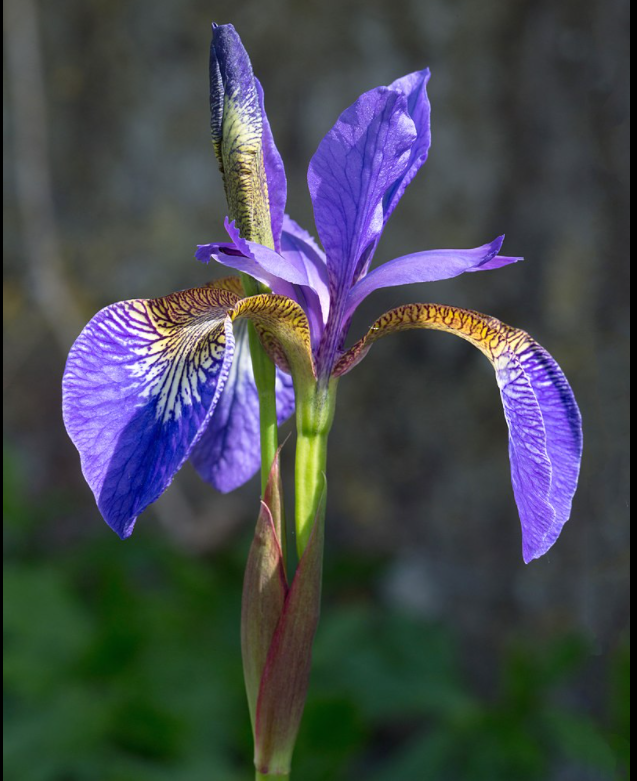
<img> Source="https://en.wikipedia.org/wiki/Iris_(plant)#/media/File:Iris_germanica_(Purple_bearded_Iris),_Wakehurst_Place,_UK_-_Diliff.jpg"/ >

#### Step 1. Handling the data

The very first step will be handling the iris dataset. Open the dataset using the open function and read the data lines with the reader function available under the csv module.


In [3]:
import csv
with open(r'C:\Users\ANURAG\Desktop\Iris dataset\iris.data') as csvfile:
    lines = csv.reader(csvfile)
    for rows in lines:
        print(', '.join(rows))

5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

Now we need to split the data into a training dataset (for making the prediction) and a testing dataset (for evaluating the accuracy of the model). 

Before we continue, convert the flower measures loaded as strings to numbers. Next, randomly split the dataset into train and test dataset. Generally, a standard ratio of 67/33 is used for test/train split

Adding it all, let’s define a function __handleDataset__ which will load the CSV when provided with the exact filename and splits it randomly into train and test datasets using the provided split ratio.

In [4]:
import random
import math
import operator
import numpy as np
 
def handleDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x]) 
            else:
                testSet.append(dataset[x]) 

Testing ___handleDataset___ function

In [5]:
trainingSet = []
testSet = []
handleDataset(r'C:\Users\ANURAG\Desktop\Iris dataset\iris.data',0.66,trainingSet,testSet)
print("Train: " + repr(len(trainingSet)))
print('Test: ' + repr(len(testSet)))


Train: 108
Test: 42


#### Step 2. Calculate the distance
In order to make any predictions, you have to calculate the distance between the new point and the existing points, as we will be needing k closest points.

In this case for calculating the distance, we will use the Euclidean distance. This is defined as the square root of the sum of the *squared differences between the two arrays of numbers*

Specifically, we need only first 4 attributes(features) for distance calculation as the last attribute is a class label. So for one of the approach is to limit the Euclidean distance to a fixed length, thereby ignoring the final dimension.

Summing it up let’s define __euclideanDistance__ function as follows:


In [6]:
def euclideanDistance(instance1, instance2, length): 
    distance = 0 
    for x in range(length): 
        distance += pow((instance1[x] - instance2[x]), 2) 
    return math.sqrt(distance) 

In [7]:
data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distance = euclideanDistance(data1, data2, 3)
print('Distance: ' + repr(distance))

Distance: 3.4641016151377544


#### Step 3: Find k nearest point

Now that we have calculated the distance from each point, we can use it collect the k most similar points/instances for the given test data/instance.

This is a straightforward process: Calculate the distance wrt all the instance and select the subset having the smallest Euclidean distance.

Let’s create a getKNeighbors function that  returns k most similar neighbors from the training set for a given test instance.

In [8]:
def getKNeighbors(trainingSet, testInstance, k): 
    distances = [] 
    length = len(testInstance)-1 
    for x in range(len(trainingSet)): 
        dist = euclideanDistance(testInstance, trainingSet[x], length) 
        distances.append((trainingSet[x], dist)) 
    distances.sort(key=operator.itemgetter(1)) 
    neighbors = [] 
    for x in range(k): 
        neighbors.append(distances[x][0]) 
    return neighbors 

Testing __getKNeighbors__ function

In [9]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1
neighbors = getKNeighbors(trainSet, testInstance, 1)
print(neighbors)


[[4, 4, 4, 'b']]


#### Step 4: Predict the class

Now that you have the k nearest points/neighbors for the given test instance, the next task is to predicted response based on those neighbors

You can do this by allowing each neighbor to vote for their class attribute, and take the majority vote as the prediction.

Let’s create a *getResponse* function for getting the majority voted response from a number of neighbors.

In [10]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]                                            
 

Testing *__getResponse__* function


In [11]:
neighbors = [[1, 1, 1, 'a'], [2, 2, 2, 'a'], [3, 3, 3, 'b']]
print(getResponse(neighbors))

a


#### Step 5. Check the accuracy 

Now that we have all of the pieces of the kNN algorithm in place. Let’s check how accurate our prediction is!

An easy way to evaluate the accuracy of the model is to calculate a ratio of the total correct predictions out of all predictions made.

Let’s create a getAccuracy function which sums the total correct predictions and returns the accuracy as a percentage of correct classification.


In [12]:
def getAccuracy(true_y,pred_y):
    x = 0.0
    for i in range(len(true_y)):
        if(true_y[i][4]==pred_y[i]):
            x+=1
    return x/len(true_y)


Since we have created all the pieces of the KNN algorithm, let’s tie them up using the main function.



In [13]:
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.67
    handleDataset(r'C:\Users\ANURAG\Desktop\Iris dataset\iris.data', split, trainingSet, testSet)
    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    k = 3
    for x in range(len(testSet)):
        neighbors = getKNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy=getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy*100)+ '%')

main()

Train set: 107
Test set: 43
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-ve

The model gives really good results!